# Aprendizaje por Refuerzo con Q-learning en FrozenLake

En este ejercicio vamos a explorar el **aprendizaje por refuerzo** usando un entorno clásico de la librería `gymnasium`: **FrozenLake**.

El objetivo es que un agente aprenda a cruzar un lago congelado sin caer al agua. El entorno es una cuadrícula donde algunas casillas son seguras y otras son agujeros. El agente debe aprender una estrategia que maximice su probabilidad de llegar a la meta.

Utilizaremos el algoritmo **Q-learning**, que permite al agente aprender una tabla de valores (Q-table) sobre qué tan buena es cada acción en cada estado.

### Librerías necesarias

- `gymnasium`: para cargar el entorno FrozenLake
- `numpy`: para cálculos numéricos
- `random`: para decisiones aleatorias (estrategia epsilon-greedy)

¿Qué es una acción con política epsilon-greedy?
Es la estrategia que usa el agente para equilibrar exploración y explotación.
ε (epsilon) es un número entre 0 y 1.


Con probabilidad ε, el agente elige una acción aleatoria → explorar caminos nuevos.


Con probabilidad 1 - ε, elige la mejor acción conocida según la Q-table → explotar lo que ya sabe.


Esto es como si dijeras:
“Sé que este camino me lleva al premio, pero voy a probar otra ruta, por si acaso hay algo mejor”.
Conforme baja epsilon, el agente explora menos y explota más lo que ya aprendió.

In [1]:
import gymnasium as gym
import numpy as np
import random

### Paso 1: Crear el entorno FrozenLake

In [3]:
# Creamos el entorno 4x4 con superficies no resbaladizas para facilitar el aprendizaje
env = gym.make('FrozenLake-v1', is_slippery=False)
env.reset()

(0, {'prob': 1})

### Paso 2: Inicializamos la Q-table

La Q-table es como la "memoria" del agente. Es una tabla de valores Q[s, a] que representa cuán buena es una acción a en un estado s.
Al principio, todos los valores están en 0 porque el agente no ha aprendido nada aún.


Con cada episodio, el agente actualiza esos valores basándose en su experiencia.


In [4]:
# Q-table de tamaño [número de estados, número de acciones]
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print("Q-table inicializada con ceros:")
print(q_table)

Q-table inicializada con ceros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Paso 3: Definimos los hiperparámetros del algoritmo

In [5]:
# Hiperparámetros
num_episodios = 1000
max_pasos = 100
alpha = 0.1       # tasa de aprendizaje
gamma = 0.99      # factor de descuento
epsilon = 1.0     # probabilidad de explorar
epsilon_min = 0.01
epsilon_decay = 0.995

### Paso 4: Entrenamiento con Q-learning

In [6]:
rewards = []

for episodio in range(num_episodios):
    estado, _ = env.reset()
    total_reward = 0
    for paso in range(max_pasos):
        # Elegimos acción con política epsilon-greedy
        if random.uniform(0, 1) < epsilon:
            accion = env.action_space.sample()
        else:
            accion = np.argmax(q_table[estado])

        nuevo_estado, recompensa, terminado, truncado, _ = env.step(accion)

        # Actualización Q-learning
        q_table[estado, accion] = q_table[estado, accion] + alpha * (recompensa + gamma * np.max(q_table[nuevo_estado]) - q_table[estado, accion])

        estado = nuevo_estado
        total_reward += recompensa

        if terminado or truncado:
            break

    # Reducimos epsilon (menos exploración con el tiempo)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)

print("Entrenamiento terminado.")

Entrenamiento terminado.


### Paso 5: Recompensas obtenidas por episodio

¿Cómo interpretar tu gráfica de recompensas?
La gráfica muestra recompensas por episodio (valores entre 0 y 1).

0 → el agente cayó en el agua.


1 → el agente llegó a la meta.


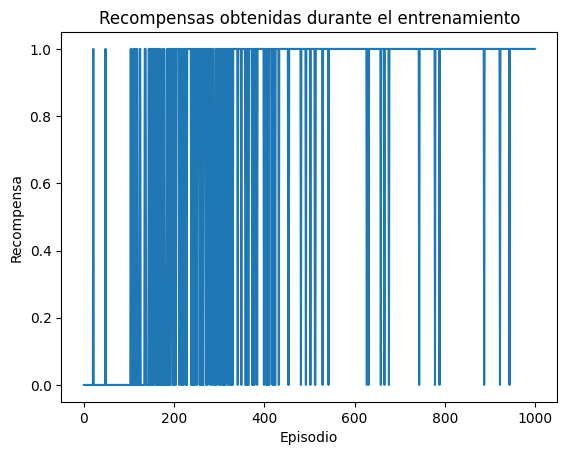

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rewards)
plt.xlabel('Episodio')
plt.ylabel('Recompensa')
plt.title('Recompensas obtenidas durante el entrenamiento')
plt.show()

**Observaciones clave:**

Al inicio (episodios < 100), muchas recompensas son 0 → el agente no sabe nada y explora.


Luego empieza a haber más 1s → empieza a aprender caminos exitosos.


Al final, casi todas son 1 → el agente aprendió a llegar a la meta consistentemente


### Paso 6: Evaluación del agente entrenado

In [ ]:
total_test_episodes = 10
for episodio in range(total_test_episodes):
    estado, _ = env.reset()
    print(f"\nEpisodio {episodio+1}:")
    for paso in range(max_pasos):
        accion = np.argmax(q_table[estado])
        nuevo_estado, recompensa, terminado, truncado, _ = env.step(accion)
        env.render()
        estado = nuevo_estado
        if terminado or truncado:
            print("Recompensa final:", recompensa)
            break


Episodio 1:
Recompensa final: 1.0

Episodio 2:
Recompensa final: 1.0

Episodio 3:
Recompensa final: 1.0

Episodio 4:
Recompensa final: 1.0

Episodio 5:
Recompensa final: 1.0

Episodio 6:
Recompensa final: 1.0

Episodio 7:
Recompensa final: 1.0

Episodio 8:
Recompensa final: 1.0

Episodio 9:
Recompensa final: 1.0

Episodio 10:
Recompensa final: 1.0


/usr/local/lib/python3.11/dist-packages/gymnasium/envs/toy_text/frozen_lake.py:333: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("FrozenLake-v1", render_mode="rgb_array")
  gym.logger.warn(
